In [31]:
import pandas as pd
import os
import numpy as np
import zipfile
from multiprocessing import  Pool
import matplotlib.pyplot as plt
from itertools import product
import sklearn.cluster

In [2]:
os.getenv("SLURM_CPUS_ON_NODE",1)

'40'

## Unzip the data

In [8]:
# Unzip the data
with zipfile.ZipFile('data/data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## Helper functions

In [11]:
def parallelize_dataframe(df, func, n_cores=256):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()

In [12]:
def convert_time(df):
    df['Time'] = df['Time'].apply(lambda x:pd.to_datetime(x))

## Read the data

In [3]:
data = pd.read_csv("data/data/00_data.csv", sep=" ")


## Drop the wrong multiindex

In [4]:
# Drop the errenous multiindex
new_index = data.index.droplevel(level=1)
data = data.set_index(new_index)

In [5]:
# Remove the unnecessary Time column
data = data.drop('Time', axis=1)

In [6]:
data = data.rename(columns = {'Date.Time': 'Time'})

In [7]:
data.Time = pd.to_datetime(data.Time)

## Select time range 2019

In [8]:
data_2018 = data[(data.Time > '2018-01-01') & (data.Time < '2019-01-01') ]

In [99]:
bins_dt = pd.to_datetime(pd.date_range(start='2018-01-01', end='2019-01-01', freq='15m'))

IndexError: index 1 is out of bounds for axis 0 with size 1

In [12]:
def correlation(df, columns):
    column_flag = [i + '_Flag' for i in columns]
    df = df[columns + column_flag]
    for i in column_flag:
        df = df[df[i] == 'OK']
    return df.corr()

def covariance(df, columns):
    if columns[0] != columns[1]:
        column_flag = [i + '_Flag' for i in columns]
        df = df[columns + column_flag]
        for i in column_flag:
            df = df[df[i] == 'OK']
        return df.cov()
    else:
        column_flag = [i + '_Flag' for i in columns]
        df = df[[columns[0], column_flag[0]]]
        for i in column_flag:
            df = df[df[i] == 'OK']
        return df.var()

#correlation(df=data, columns=['SM1', 'SM2'])
    

In [170]:
len(data_2018)

789820

In [193]:
temp_squared = product(temp, temp)


[('Temp1', 'Temp1'),
 ('Temp1', 'Temp2'),
 ('Temp1', 'Temp3'),
 ('Temp1', 'Temp4'),
 ('Temp1', 'Temp5'),
 ('Temp1', 'Temp6'),
 ('Temp2', 'Temp1'),
 ('Temp2', 'Temp2'),
 ('Temp2', 'Temp3'),
 ('Temp2', 'Temp4'),
 ('Temp2', 'Temp5'),
 ('Temp2', 'Temp6'),
 ('Temp3', 'Temp1'),
 ('Temp3', 'Temp2'),
 ('Temp3', 'Temp3'),
 ('Temp3', 'Temp4'),
 ('Temp3', 'Temp5'),
 ('Temp3', 'Temp6'),
 ('Temp4', 'Temp1'),
 ('Temp4', 'Temp2'),
 ('Temp4', 'Temp3'),
 ('Temp4', 'Temp4'),
 ('Temp4', 'Temp5'),
 ('Temp4', 'Temp6'),
 ('Temp5', 'Temp1'),
 ('Temp5', 'Temp2'),
 ('Temp5', 'Temp3'),
 ('Temp5', 'Temp4'),
 ('Temp5', 'Temp5'),
 ('Temp5', 'Temp6'),
 ('Temp6', 'Temp1'),
 ('Temp6', 'Temp2'),
 ('Temp6', 'Temp3'),
 ('Temp6', 'Temp4'),
 ('Temp6', 'Temp5'),
 ('Temp6', 'Temp6')]

In [209]:
correlation(data_2018, ['temp1', 'temp1'])

KeyError: "None of [Index(['temp1', 'temp1', 'temp1_Flag', 'temp1_Flag'], dtype='object')] are in the [columns]"

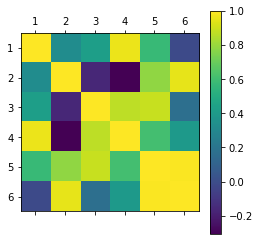

In [234]:
# Temperature
temp = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6']
corr_array = np.zeros((len(temp), len(temp)))


for index1, i in enumerate(temp):
    for index2, j in enumerate(temp):
        if index1 != index2:
            corr_array[index1][index2] = correlation(data_2018, [i, j])[i][1]
            #print(correlation(data_2018, [i, j])[i][1])
        else:
            corr_array[index1][index2] = 1
plt.matshow(corr_array)
#plt.xticks(np.arange(1, 6, 1));
#plt.yticks(np.arange(1, 6, 1));
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));
ax.set_xticklabels(np.arange(1, 7, 1));
ax.set_yticklabels(np.arange(1, 7, 1));
plt.colorbar()
plt.show()

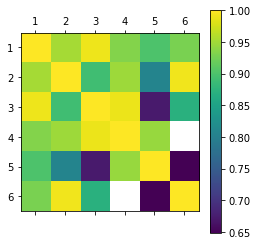

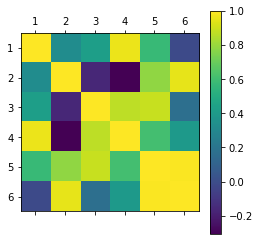

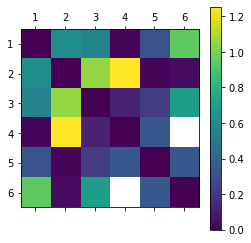

In [236]:
# SM
sm = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']
sm_array = np.zeros((len(sm), len(sm)))


for index1, i in enumerate(sm):
    for index2, j in enumerate(sm):
        if index1 != index2:
            sm_array[index1][index2] = correlation(data_2018, [i, j])[i][1]
            #print(correlation(data_2018, [i, j])[i][1])
        else:
            sm_array[index1][index2] = 1
        
plt.matshow(sm_array)
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));
ax.set_xticklabels(np.arange(1, 7, 1));
ax.set_yticklabels(np.arange(1, 7, 1));
plt.colorbar()
plt.show()

plt.matshow(corr_array)
#plt.xticks(np.arange(1, 6, 1));
#plt.yticks(np.arange(1, 6, 1));
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));
ax.set_xticklabels(np.arange(1, 7, 1));
ax.set_yticklabels(np.arange(1, 7, 1));
plt.colorbar()
plt.show()

plt.matshow(np.abs(corr_array-sm_array))
#plt.xticks(np.arange(1, 6, 1));
#plt.yticks(np.arange(1, 6, 1));
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));
ax.set_xticklabels(np.arange(1, 7, 1));
ax.set_yticklabels(np.arange(1, 7, 1));
plt.colorbar()
plt.show()

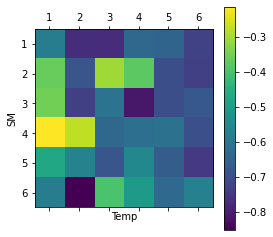

In [30]:
# Temperature
temp = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6', 'Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6']
corr_array = np.zeros((len(temp), len(temp)))


for index1, i in enumerate(temp):
    for index2, j in enumerate(temp):
        if index1 != index2:
            corr_array[index1][index2] = correlation(data_2018, [i, j])[i][1]
            #print(correlation(data_2018, [i, j])[i][1])
        else:
            corr_array[index1][index2] = 1
plt.matshow(corr_array[:6,6:])
#plt.matshow(corr_array)

#plt.xticks(np.arange(1, 6, 1));
#plt.yticks(np.arange(1, 6, 1));
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));
ax.set_xticklabels(np.arange(1, 7, 1));
ax.set_yticklabels(np.arange(1, 7, 1));
plt.ylabel('SM')
plt.xlabel('Temp')
plt.colorbar()
plt.show()

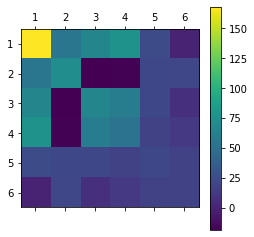

In [14]:
# Temperature
temp = ['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6']
corr_array = np.zeros((len(temp), len(temp)))


for index1, i in enumerate(temp):
    for index2, j in enumerate(temp):
        if index1 != index2:
            corr_array[index1][index2] = covariance(data_2018, [i, j])[i][1]
            #print(correlation(data_2018, [i, j])[i][1])
        else:
            corr_array[index1][index2] = covariance(data_2018, [i, j])
plt.matshow(corr_array)
#plt.xticks(np.arange(1, 6, 1));
#plt.yticks(np.arange(1, 6, 1));
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));
ax.set_xticklabels(np.arange(1, 7, 1));
ax.set_yticklabels(np.arange(1, 7, 1));
plt.colorbar()
plt.show()

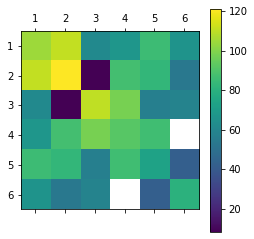

In [16]:
# SM
sm = ['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']
sm_array = np.zeros((len(sm), len(sm)))


for index1, i in enumerate(sm):
    for index2, j in enumerate(sm):
        if index1 != index2:
            sm_array[index1][index2] = covariance(data_2018, [i, j])[i][1]
            #print(correlation(data_2018, [i, j])[i][1])
        else:
            sm_array[index1][index2] = covariance(data_2018, [i, j])
        
plt.matshow(sm_array)
ax = plt.gca()
ax.set_xticks(np.arange(0, 6, 1));
ax.set_yticks(np.arange(0, 6, 1));
ax.set_xticklabels(np.arange(1, 7, 1));
ax.set_yticklabels(np.arange(1, 7, 1));
plt.colorbar()
plt.show()


In [202]:
correlation(data_2018, ['Temp2', 'Temp6'])['Temp2'][1]

0.9499549528112321

In [152]:
data_2018.head(100)

,Box,Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,Temp2_Flag,...,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth,Timebox
4.239682,4,2018-01-01 00:17:41,-15.9409,Auto:Range,-17.1480,Manual,26.4749,OK,5.7372,OK,...,5.4590,OK,3436,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 00:15:00, 2018-01-01 00:30:00]"
4.239684,4,2018-01-01 00:27:13,-15.9409,Auto:Range,-17.1480,Manual,26.5212,OK,5.7372,OK,...,5.4590,OK,3436,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 00:15:00, 2018-01-01 00:30:00]"
4.239686,4,2018-01-01 00:36:45,-15.9409,Auto:Range,-17.1480,Manual,26.5235,OK,5.7720,OK,...,5.4590,OK,3437,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 00:30:00, 2018-01-01 00:45:00]"
4.239688,4,2018-01-01 00:46:17,-15.9409,Auto:Range,-17.1480,Manual,26.5235,OK,5.7720,OK,...,5.4590,OK,3436,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 00:45:00, 2018-01-01 01:00:00]"
4.239690,4,2018-01-01 01:05:28,-15.9409,Auto:Range,-17.1480,Manual,26.4749,OK,5.7372,OK,...,5.4242,OK,3436,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 01:00:00, 2018-01-01 01:15:00]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.239846,4,2018-01-01 15:32:39,-15.9968,Auto:Range,-17.1828,Manual,26.4749,OK,5.7372,OK,...,5.6676,OK,3416,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 15:30:00, 2018-01-01 15:45:00]"
4.239847,4,2018-01-01 15:42:11,-15.9968,Auto:Range,-17.1828,Manual,26.4773,OK,5.7720,OK,...,5.6676,OK,3415,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 15:30:00, 2018-01-01 15:45:00]"
4.239848,4,2018-01-01 15:51:42,-15.9968,Auto:Range,-17.1828,Manual,26.5699,OK,5.7720,OK,...,5.6676,OK,3414,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 15:45:00, 2018-01-01 16:00:00]"
4.239849,4,2018-01-01 16:01:14,-15.9968,Auto:Range,-17.1828,Manual,26.5259,OK,5.8068,OK,...,5.6329,OK,3413,0.05,0.1,0.2,0.3,0.5,0.6,"(2018-01-01 16:00:00, 2018-01-01 16:15:00]"


### Redundant sensor correlations

In [139]:
data_2018[['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']].corr()

,SM1,SM2,SM3,SM4,SM5,SM6
SM1,1.000000,-0.148274,0.075778,0.189591,-0.073892,0.029532
SM2,-0.148274,1.000000,-0.034845,-0.217325,0.103844,0.140607
SM3,0.075778,-0.034845,1.000000,-0.041902,-0.096219,-0.003521
SM4,0.189591,-0.217325,-0.041902,1.000000,0.129493,-0.129496
SM5,-0.073892,0.103844,-0.096219,0.129493,1.000000,-0.017012
SM6,0.029532,0.140607,-0.003521,-0.129496,-0.017012,1.000000


In [140]:
data_2018[['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6']].corr()

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6
Temp1,1.000000,-0.160752,-0.008840,0.546063,0.386545,0.017444
Temp2,-0.160752,1.000000,-0.066816,-0.250370,-0.066344,0.286789
Temp3,-0.008840,-0.066816,1.000000,0.353387,0.251482,0.042075
Temp4,0.546063,-0.250370,0.353387,1.000000,0.329203,0.057023
Temp5,0.386545,-0.066344,0.251482,0.329203,1.000000,0.064393
Temp6,0.017444,0.286789,0.042075,0.057023,0.064393,1.000000


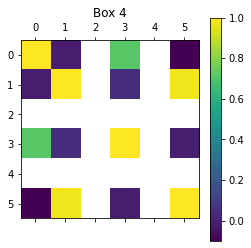

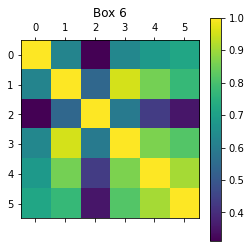

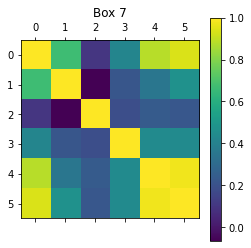

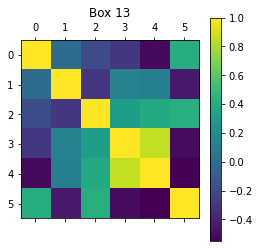

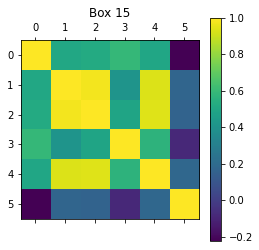

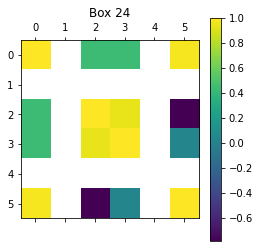

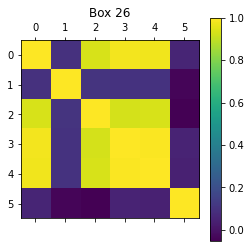

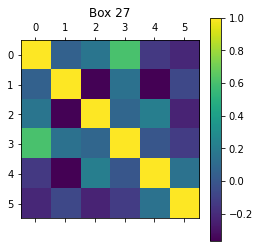

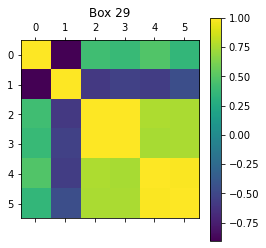

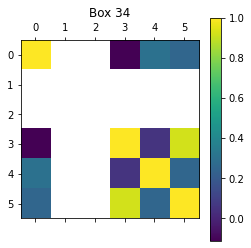

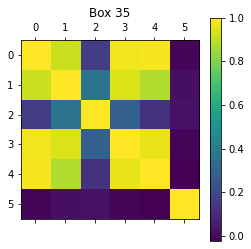

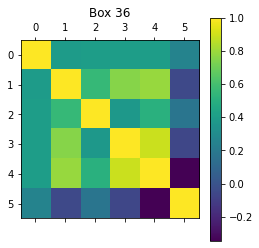

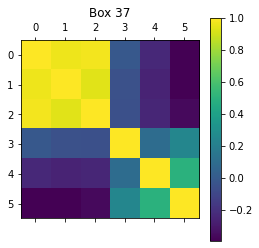

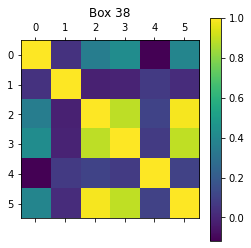

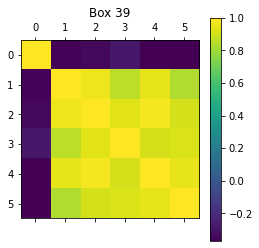

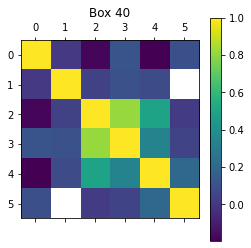

In [150]:
for i in np.unique(data_2018.Box):
    plt.matshow(data_2018[data_2018.Box == i][['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'SM6']].corr())
    plt.colorbar()
    plt.title(f'Box {i}')
    plt.show()

In [145]:
data_2018[data_2018.Box == 6][['Temp1', 'Temp2', 'Temp3', 'Temp4', 'Temp5', 'Temp6']].corr()

,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6
Temp1,1.000000,0.865995,0.112734,0.658439,-0.155585,-0.291542
Temp2,0.865995,1.000000,0.330268,0.897041,-0.009996,-0.223740
Temp3,0.112734,0.330268,1.000000,0.471806,-0.047503,-0.599086
Temp4,0.658439,0.897041,0.471806,1.000000,-0.018774,-0.228203
Temp5,-0.155585,-0.009996,-0.047503,-0.018774,1.000000,0.489418
Temp6,-0.291542,-0.223740,-0.599086,-0.228203,0.489418,1.000000


In [132]:
bins = pd.interval_range(start=pd.Timestamp('2018-01-01 00:00:00'), end=pd.Timestamp('2019-01-01 00:00:00'), freq='15min')

In [133]:
bins

IntervalIndex([(2018-01-01, 2018-01-01 00:15:00], (2018-01-01 00:15:00, 2018-01-01 00:30:00], (2018-01-01 00:30:00, 2018-01-01 00:45:00], (2018-01-01 00:45:00, 2018-01-01 01:00:00], (2018-01-01 01:00:00, 2018-01-01 01:15:00] ... (2018-12-31 22:45:00, 2018-12-31 23:00:00], (2018-12-31 23:00:00, 2018-12-31 23:15:00], (2018-12-31 23:15:00, 2018-12-31 23:30:00], (2018-12-31 23:30:00, 2018-12-31 23:45:00], (2018-12-31 23:45:00, 2019-01-01]],
              closed='right',
              dtype='interval[datetime64[ns]]')

In [135]:
data_2018['Timebox'] = pd.cut(data_2018.Time, bins)

/opt/bwhpc/common/devel/jupyter_ml/lib64/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
data_2018.groupby(['Box', 'Timebox']).mean()

SM1    Temp1       SM2  \
Box Timebox                                                                   
4   (2018-01-01, 2018-01-01 00:15:00]                NaN      NaN       NaN   
    (2018-01-01 00:15:00, 2018-01-01 00:30:00] -15.94090 -17.1480  26.49805   
    (2018-01-01 00:30:00, 2018-01-01 00:45:00] -15.94090 -17.1480  26.52350   
    (2018-01-01 00:45:00, 2018-01-01 01:00:00] -15.94090 -17.1480  26.52350   
    (2018-01-01 01:00:00, 2018-01-01 01:15:00] -15.94090 -17.1480  26.52120   
...                                                  ...      ...       ...   
40  (2018-12-31 22:45:00, 2018-12-31 23:00:00] -12.35275 -18.0697       NaN   
    (2018-12-31 23:00:00, 2018-12-31 23:15:00] -12.35220 -18.0871       NaN   
    (2018-12-31 23:15:00, 2018-12-31 23:30:00] -12.35220 -18.0871       NaN   
    (2018-12-31 23:30:00, 2018-12-31 23:45:00] -12.35220 -18.0871       NaN   
    (2018-12-31 23:45:00, 2019-01-01]          -12.35220 -18.0871       NaN   

                                                  Temp2      SM3    Temp3  \
Box Timebox                                                                 
4   (2018-01-01, 2018-01-01 00:15:00]               NaN      NaN      NaN   
    (2018-01-01 00:15:00, 2018-01-01 00:30:00]   5.7372      NaN -17.0437   
    (2018-01-01 00:30:00, 2018-01-01 00:45:00]   5.7720      NaN -17.0437   
    (2018-01-01 00:45:00, 2018-01-01 01:00:00]   5.7720      NaN -17.0437   
    (2018-01-01 01:00:00, 2018-01-01 01:15:00]   5.7372      NaN -17.0437   
...                                                 ...      ...      ...   
40  (2018-12-31 22:45:00, 2018-12-31 23:00:00] -18.2610 -10.6891 -18.4001   
    (2018-12-31 23:00:00, 2018-12-31 23:15:00] -18.2610 -10.7065 -18.4001   
    (2018-12-31 23:15:00, 2018-12-31 23:30:00] -18.2610 -10.6978 -18.4001   
    (2018-12-31 23:30:00, 2018-12-31 23:45:00] -18.2610 -10.6891 -18.4001   
    (2018-12-31 23:45:00, 2019-01-01]          -18.2610 -10.7065 -18.4001   

                                                    SM4    Temp4       SM5  \
Box Timebox                                                                  
4   (2018-01-01, 2018-01-01 00:15:00]               NaN      NaN       NaN   
    (2018-01-01 00:15:00, 2018-01-01 00:30:00]      NaN -16.6611       NaN   
    (2018-01-01 00:30:00, 2018-01-01 00:45:00]      NaN -16.6611       NaN   
    (2018-01-01 00:45:00, 2018-01-01 01:00:00]      NaN -16.6959       NaN   
    (2018-01-01 01:00:00, 2018-01-01 01:15:00]      NaN -16.6611       NaN   
...                                                 ...      ...       ...   
40  (2018-12-31 22:45:00, 2018-12-31 23:00:00] -14.3816 -18.1219 -13.06965   
    (2018-12-31 23:00:00, 2018-12-31 23:15:00] -14.3816 -18.1219 -13.07020   
    (2018-12-31 23:15:00, 2018-12-31 23:30:00] -14.3804 -18.1567 -13.07020   
    (2018-12-31 23:30:00, 2018-12-31 23:45:00] -14.3816 -18.1219 -13.07020   
    (2018-12-31 23:45:00, 2019-01-01]          -14.3810 -18.1393 -13.06910   

                                                   Temp5       SM6   Temp6  \
Box Timebox                                                                  
4   (2018-01-01, 2018-01-01 00:15:00]                NaN       NaN     NaN   
    (2018-01-01 00:15:00, 2018-01-01 00:30:00] -17.87840  29.39395  5.4590   
    (2018-01-01 00:30:00, 2018-01-01 00:45:00] -17.87840  29.47450  5.4590   
    (2018-01-01 00:45:00, 2018-01-01 01:00:00] -17.87840  29.47450  5.4590   
    (2018-01-01 01:00:00, 2018-01-01 01:15:00] -17.87840  29.47320  5.4416   
...                                                  ...       ...     ...   
40  (2018-12-31 22:45:00, 2018-12-31 23:00:00] -15.56555  32.59775  5.9459   
    (2018-12-31 23:00:00, 2018-12-31 23:15:00] -15.54820  33.57830  5.9459   
    (2018-12-31 23:15:00, 2018-12-31 23:30:00] -15.54820  33.20060  5.9633   
    (2018-12-31 23:30:00, 2018-12-31 23:45:00] -15.54820  32.22700  5.9459   
    (2018-12-31 23:45:00, 2019-01-01]          -15.58290  33.16640  5.96

In [100]:
pd.cut(data_2018.Time, bins_dt)

TypeError: category, object, and string subtypes are not supported for IntervalIndex

In [88]:
data_2018.sort_values('Time').groupby('Box').Time.diff().max()

Timedelta('24 days 13:34:42')

In [66]:
sub_data = data.head(1000)

In [67]:
sub_data

,Box,Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,Temp2_Flag,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
1.2000,1,2012-07-19 17:45:53,-2.8240,Auto:Range,18.2580,OK,-5.9817,Auto:Range,18.2232,OK,...,Auto:Range,18.3623,OK,3599,0.05,0.05,0.05,0.05,0.05,0.05
2.2000,2,2010-10-03 02:07:00,29.9656,OK,5.0416,OK,-4.8066,Auto:Range,-15.1656,OK,...,OK,5.7372,OK,3138,0.10,0.20,0.30,0.40,0.50,0.60
2.3000,2,2010-10-03 03:07:00,26.1448,OK,8.4848,OK,23.7972,OK,7.7544,OK,...,Auto:Spike,6.8154,OK,3496,0.10,0.20,0.30,0.40,0.50,0.60
2.4000,2,2010-10-06 05:08:00,29.7645,OK,4.9373,OK,-4.7984,Auto:Range,-15.1656,OK,...,OK,5.7024,OK,3198,0.10,0.20,0.30,0.40,0.50,0.60
2.5000,2,2010-10-10 04:09:00,29.9037,OK,5.0764,OK,-4.8066,Auto:Range,-15.1656,OK,...,OK,5.7720,OK,3209,0.10,0.20,0.30,0.40,0.50,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.1010,2,2012-07-29 08:13:01,21.4428,OK,16.9364,OK,23.3111,OK,16.8320,OK,...,OK,17.4581,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60
2.1011,2,2012-07-29 08:28:05,21.3151,OK,16.9364,OK,23.1793,OK,16.9364,OK,...,OK,17.3885,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60
2.1012,2,2012-07-29 08:43:10,21.2784,OK,17.0407,OK,23.1314,OK,16.9016,OK,...,OK,17.4233,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60
2.1013,2,2012-07-29 08:58:15,21.2803,OK,17.0755,OK,23.1772,OK,16.9016,OK,...,OK,17.4581,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60


In [70]:
sub_data[sub_data.Time > '2019-01-01']

,Box,Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,Temp2_Flag,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
1.2000,1,2012-07-19 17:45:53,-2.8240,Auto:Range,18.2580,OK,-5.9817,Auto:Range,18.2232,OK,...,Auto:Range,18.3623,OK,3599,0.05,0.05,0.05,0.05,0.05,0.05
2.2000,2,2010-10-03 02:07:00,29.9656,OK,5.0416,OK,-4.8066,Auto:Range,-15.1656,OK,...,OK,5.7372,OK,3138,0.10,0.20,0.30,0.40,0.50,0.60
2.3000,2,2010-10-03 03:07:00,26.1448,OK,8.4848,OK,23.7972,OK,7.7544,OK,...,Auto:Spike,6.8154,OK,3496,0.10,0.20,0.30,0.40,0.50,0.60
2.4000,2,2010-10-06 05:08:00,29.7645,OK,4.9373,OK,-4.7984,Auto:Range,-15.1656,OK,...,OK,5.7024,OK,3198,0.10,0.20,0.30,0.40,0.50,0.60
2.5000,2,2010-10-10 04:09:00,29.9037,OK,5.0764,OK,-4.8066,Auto:Range,-15.1656,OK,...,OK,5.7720,OK,3209,0.10,0.20,0.30,0.40,0.50,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.1010,2,2012-07-29 08:13:01,21.4428,OK,16.9364,OK,23.3111,OK,16.8320,OK,...,OK,17.4581,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60
2.1011,2,2012-07-29 08:28:05,21.3151,OK,16.9364,OK,23.1793,OK,16.9364,OK,...,OK,17.3885,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60
2.1012,2,2012-07-29 08:43:10,21.2784,OK,17.0407,OK,23.1314,OK,16.9016,OK,...,OK,17.4233,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60
2.1013,2,2012-07-29 08:58:15,21.2803,OK,17.0755,OK,23.1772,OK,16.9016,OK,...,OK,17.4581,OK,3594,0.10,0.20,0.30,0.40,0.50,0.60


In [59]:
sub_data.Time = pd.to_datetime(sub_data.Time)

/opt/bwhpc/common/devel/jupyter_ml/lib64/python3.6/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [63]:
sub_data.dtypes

Box                    int64
Time          datetime64[ns]
SM1                  float64
SM1_Flag              object
Temp1                float64
Temp1_Flag            object
SM2                  float64
SM2_Flag              object
Temp2                float64
Temp2_Flag            object
SM3                  float64
SM3_Flag              object
Temp3                float64
Temp3_Flag            object
SM4                  float64
SM4_Flag              object
Temp4                float64
Temp4_Flag            object
SM5                  float64
SM5_Flag              object
Temp5                float64
Temp5_Flag            object
SM6                  float64
SM6_Flag              object
Temp6                float64
Temp6_Flag            object
BattV                  int64
SM1_Depth            float64
SM2_Depth            float64
SM3_Depth            float64
SM4_Depth            float64
SM5_Depth            float64
SM6_Depth            float64
dtype: object

Float64Index([   1.2,    2.2,    2.3,    2.4,    2.5,    2.6,    2.7,    2.8,
                 2.9,    2.1,
              ...
              2.1005, 2.1006, 2.1007, 2.1008, 2.1009,  2.101, 2.1011, 2.1012,
              2.1013, 2.1014],
             dtype='float64', length=1000)

In [27]:
sub_data = data.sample(100000)

In [30]:
sub_data

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
13.223118,2017-10-07,2020-11-05 04:24:54,13,2017-10-07 04:24:54,-10.2671,Auto:Range,-17.5306,Manual,-5.5423,Auto:Range,-5.8445,...,Auto:Range,12.0324,OK,3461,0.05,0.1,0.2,0.3,0.5,0.6
2.569450,2013-09-07,2020-11-05 11:28:00,2,2013-09-07 11:28:00,3.5482,Auto:Range,19.5101,OK,5.7452,OK,17.4928,...,Auto:Range,19.2666,OK,3568,0.10,0.2,0.3,0.4,0.5,0.6
15.689170,2013-12-24,2020-11-05 05:26:38,15,2013-12-24 05:26:38,17.3862,OK,5.7372,OK,21.4443,OK,5.6329,...,OK,5.5981,OK,3495,0.05,0.1,0.2,0.3,0.4,0.5
15.141343,2016-01-12,2020-11-05 10:44:07,15,2016-01-12 10:44:07,-10.2878,Auto:Range,-18.3653,Manual,26.7643,OK,2.7113,...,OK,4.9720,OK,3368,0.05,0.1,0.2,0.3,0.4,0.5
29.702630,2014-08-15,2020-11-05 01:31:57,29,2014-08-15 01:31:57,-10.7036,Auto:Range,-12.1745,Manual,60.5370,Auto:Range,20.2405,...,OK,15.2321,Manual,3039,0.10,0.2,0.3,0.4,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39.324044,2019-02-22,2020-11-05 06:27:27,39,2019-02-22 06:27:27,-11.8285,Auto:Range,-16.5220,Manual,20.2343,OK,5.8068,...,Auto:Range,-16.8698,Manual,3356,0.30,0.1,0.1,0.1,0.1,0.3
4.339000,2012-07-21,2020-11-05 07:04:30,4,2012-07-21 07:04:30,37.1940,OK,12.6236,OK,38.1786,OK,12.5193,...,OK,11.9280,OK,3593,0.05,0.1,0.2,0.3,0.5,0.6
13.788300,2012-10-31,2020-11-05 15:02:26,13,2012-10-31 15:02:26,20.1921,OK,7.7197,OK,21.2071,OK,7.5805,...,OK,7.5805,OK,3504,0.05,0.1,0.2,0.3,0.5,0.6
40.271710,2013-12-18,2020-11-05 16:20:03,40,2013-12-18 16:20:03,24.7469,OK,4.7286,OK,19.1731,Manual,4.6938,...,OK,4.7981,OK,3484,0.10,0.1,0.1,0.3,0.1,0.3


In [32]:
sub_data[sub_data.Time > '2019-01-01']

,,Time,Box,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
13.223118,2017-10-07,2020-11-05 04:24:54,13,2017-10-07 04:24:54,-10.2671,Auto:Range,-17.5306,Manual,-5.5423,Auto:Range,-5.8445,...,Auto:Range,12.0324,OK,3461,0.05,0.1,0.2,0.3,0.5,0.6
2.569450,2013-09-07,2020-11-05 11:28:00,2,2013-09-07 11:28:00,3.5482,Auto:Range,19.5101,OK,5.7452,OK,17.4928,...,Auto:Range,19.2666,OK,3568,0.10,0.2,0.3,0.4,0.5,0.6
15.689170,2013-12-24,2020-11-05 05:26:38,15,2013-12-24 05:26:38,17.3862,OK,5.7372,OK,21.4443,OK,5.6329,...,OK,5.5981,OK,3495,0.05,0.1,0.2,0.3,0.4,0.5
15.141343,2016-01-12,2020-11-05 10:44:07,15,2016-01-12 10:44:07,-10.2878,Auto:Range,-18.3653,Manual,26.7643,OK,2.7113,...,OK,4.9720,OK,3368,0.05,0.1,0.2,0.3,0.4,0.5
29.702630,2014-08-15,2020-11-05 01:31:57,29,2014-08-15 01:31:57,-10.7036,Auto:Range,-12.1745,Manual,60.5370,Auto:Range,20.2405,...,OK,15.2321,Manual,3039,0.10,0.2,0.3,0.4,0.5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39.324044,2019-02-22,2020-11-05 06:27:27,39,2019-02-22 06:27:27,-11.8285,Auto:Range,-16.5220,Manual,20.2343,OK,5.8068,...,Auto:Range,-16.8698,Manual,3356,0.30,0.1,0.1,0.1,0.1,0.3
4.339000,2012-07-21,2020-11-05 07:04:30,4,2012-07-21 07:04:30,37.1940,OK,12.6236,OK,38.1786,OK,12.5193,...,OK,11.9280,OK,3593,0.05,0.1,0.2,0.3,0.5,0.6
13.788300,2012-10-31,2020-11-05 15:02:26,13,2012-10-31 15:02:26,20.1921,OK,7.7197,OK,21.2071,OK,7.5805,...,OK,7.5805,OK,3504,0.05,0.1,0.2,0.3,0.5,0.6
40.271710,2013-12-18,2020-11-05 16:20:03,40,2013-12-18 16:20:03,24.7469,OK,4.7286,OK,19.1731,Manual,4.6938,...,OK,4.7981,OK,3484,0.10,0.1,0.1,0.3,0.1,0.3


In [21]:
data.groupby('Box').count()

,Time,Date.Time,SM1,SM1_Flag,Temp1,Temp1_Flag,SM2,SM2_Flag,Temp2,Temp2_Flag,...,SM6_Flag,Temp6,Temp6_Flag,BattV,SM1_Depth,SM2_Depth,SM3_Depth,SM4_Depth,SM5_Depth,SM6_Depth
Box,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,115670,115670,115612,115670,115670,115670,115670,115670,115670,115670,...,115670,115670,115670,115670,115670,115670,115670,115670,115670,115670
3,115472,115472,115274,115472,115472,115472,82221,115472,115472,115472,...,115472,115472,115472,115472,115472,115472,115472,115472,115472,115472
4,260622,260622,260622,260622,260622,260622,257579,260622,260622,260622,...,260622,260622,260622,260622,260622,260622,260622,260622,260622,260622
5,42935,42935,42935,42935,42935,42935,42935,42935,42935,42935,...,42935,42935,42935,42935,42935,42935,42935,42935,42935,42935
6,234904,234904,234871,234904,234904,234904,196927,234904,234904,234904,...,234904,234904,234904,234904,234904,234904,234904,234904,234904,234904
7,256195,256195,228066,256195,256195,256195,251301,256195,256195,256195,...,256195,256195,256195,256195,256195,256195,256195,256195,256195,256195
8,47993,47993,47993,47993,47993,47993,47993,47993,47993,47993,...,47993,47993,47993,47993,47993,47993,47993,47993,47993,47993
9,32307,32307,32294,32307,32307,32307,29906,32307,32307,32307,...,32307,32307,32307,32307,32307,32307,32307,32307,32307,32307


In [15]:
data = parallelize_dataframe(data, convert_time)


ValueError: All objects passed were None

## DBSCAN Clustering algortihm

In [58]:
import random



# Sample from guassian distribution
outlier = 100
correlated = 2000

outlier_list = []
correlated_list = []

for i in range(outlier):
    outlier_list.append(random.gauss(0, 0.1))
    
for i in range(correlated):
    correlated_sample = random.gauss(0.8, 0.1)
    while correlated_sample > 1:
        correlated_sample = random.gauss(0.7, 0.3)
    correlated_list.append(correlated_sample)

sample_array = np.sort(np.array(outlier_list + correlated_list))

    

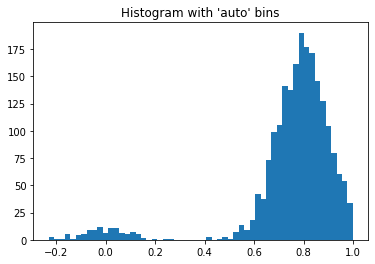

In [59]:

_ = plt.hist(sample_array, bins='auto')  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")

plt.show()

In [51]:
difference = np.diff(sample_array)
np.mean(difference)
print(difference.reshape(-1, 1))

[[0.02525528]
 [0.01166594]
 [0.00198014]
 ...
 [0.00169271]
 [0.00066238]
 [0.00060766]]


In [62]:
db = sklearn.cluster.DBSCAN(eps=0.001, min_samples=3).fit(sample_array.reshape(-1, 1))

In [63]:
labels = db.labels_
labels

array([-1, -1, -1, ..., -1, -1, -1])